# Preprocessing Task

- نفس عميق كوبايه شاي لان التاسك محتاجه مهندس بجد 
- هتلاقيني سايبلك الخرج بتاع كل سيل عشان لو عاوز تشيك علي حلك او تعرف الخرج بتاع كودك المفروض  شكله يبقي عامل ازاي 
- لو كودك صح ومطلع نتيجه مختلفه عن اللي انا مطلعها هراعي دا لا تقلق بس دي نادرا تحصل بس لو حصلت هيبقي خفيف وهراعي دا 
- التاسك دي هتنمي فيك مهاره السيرش يعني هتنميها ملهاش حل تاني 
### يلا بالتوفيق 

# Importing


In [129]:
# Import Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [130]:
# Read data and show first 5 rows 
# Read data
data = pd.read_csv('house_prices.csv') 

# Show first 5 rows
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [131]:
# Data Shape ?
print(data.shape)

(1460, 81)


In [132]:
# Data Info (Data Type of Each column) ?
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handle Null Values

In [134]:
# what the number of Numurical and Categorical Columns ?
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
num_numerical = len(numerical_cols)
num_categorical = len(categorical_cols)
print(f"#Num_cols {num_numerical}")
print(f"#Cat_cols {num_categorical}")

#Num_cols 38
#Cat_cols 43


- <b> features to be removed ---> 80%  is nan 
- <b> features to filled --------> less than 80 % 
- <b> observation to be removed --> less than 3% 

In [136]:
# Calculate the percentage of missing values in each column
null_percentage = (data.isnull().sum() / len(data)) * 100

# 1. Columns to be removed (80% or more missing values)
f_to_be_removed = null_percentage[null_percentage >= 80].index
data.drop(columns=f_to_be_removed, inplace=True)

# 2. Columns to be filled (less than 80% missing values)
f_to_be_filled = null_percentage[(null_percentage < 80) & (null_percentage > 0)].index

# Fill numeric columns with the mean
numerical_cols = data[f_to_be_filled].select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill categorical columns with the most frequent value (mode)
categorical_cols = data[f_to_be_filled].select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# 3. Rows to be removed (less than 3% missing values)
obs_to_be_removed = null_percentage[null_percentage < 3].index
data.dropna(subset=obs_to_be_removed, inplace=True)

# Print the results
print(f"Features to be removed: {f_to_be_removed}")
print(f"Numerical features to be filled: {numerical_cols}")
print(f"Categorical features to be filled: {categorical_cols}")
print(f"Observations to be removed: {obs_to_be_removed}")

Features to be removed: Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
Numerical features to be filled: Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Categorical features to be filled: Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')
Observations to be removed: Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsm

# Redundant Handling

### Automated function for both categorical and numircal data

In [139]:
# write function to calculate the most redundant value in each column how many it repeated ?
redundant_values = data.apply(lambda x: x.value_counts().idxmax())
redundant_counts = data.apply(lambda x: x.value_counts().max())
print(f"{redundant_values}: {redundant_counts}")


Id                       1
MSSubClass              20
MSZoning                RL
LotFrontage      70.049958
LotArea               7200
                   ...    
MoSold                   6
YrSold                2009
SaleType                WD
SaleCondition       Normal
SalePrice           140000
Length: 77, dtype: object: Id                  1
MSSubClass        536
MSZoning         1151
LotFrontage       259
LotArea            25
                 ... 
MoSold            253
YrSold            338
SaleType         1267
SaleCondition    1198
SalePrice          20
Length: 77, dtype: int64


In [140]:
# if it repeated more than or equal 80% from data rows count remove the feature 
f_to_be_removed = redundant_counts[redundant_counts >= 0.8 * len(data)].index
data.drop(columns=f_to_be_removed, inplace=True)

print(f" {f_to_be_removed}")


 Index(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1',
       'Condition2', 'BldgType', 'RoofMatl', 'MasVnrType', 'ExterCond',
       'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir',
       'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
       'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType',
       'SaleCondition'],
      dtype='object')


# Handling correlation between features

In [142]:
# Calculate the correlation matrix (note the correlation matrix is only for numerical features)
corr_matrix = data[numerical_cols].corr()

# Find highly correlated features (corr > 0.7)
high_corr = np.where((corr_matrix > 0.7) & (corr_matrix < 1))

# Drop one of the highly correlated features
columns_to_drop = set()
for i, j in zip(*high_corr):
    if i < j:
        columns_to_drop.add(corr_matrix.columns[j])

# Drop the highly correlated columns from the dataset
data.drop(columns=columns_to_drop, inplace=True)

print(f"Columns to be dropped: {columns_to_drop}")

Columns to be dropped: set()


#### If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable (Output column) )

# Handling Outliers 
- lower band = q1 - (1.5*IQR)
- Upper band = q3 + (1.5*IQR)

In [145]:
# Write function to remove Outliers that above Upper band or below lower band for each column 

# Skewness Handling
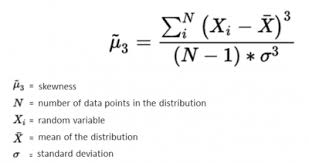


In [147]:
# write function to calc the skewness of each feature
#Note  N = train_data.shape[0]  (rows count)
  skewness = data[numerical_cols].skew()
skewness 

IndentationError: unexpected indent (781523665.py, line 3)

# Log Transformation
> X = log(1 + | X | )     
this is the equation 

In [ ]:
# Features that have absolute skewness > 1 do for it Log tranformation 
for col in skewness[abs(skewness) > 1].index:
    data[col] = np.log1p(data[col])
    print(f"Feature {col} is log_Transformed")

# Transform categorical features 

In [ ]:
# cat_cols ordinal or nominal?
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'Neighborhood','FireplaceQu']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Write code to transform each ordinal and nominal columns 
# سيرشك الجميل بقي وشوف كل واحد بيطلع ايه وازاي هتلم الداتا بتاعتك معلش هتعبك معانا يا جميل 

# Transform Numerical features 
> I want you apply only Min-Max Scaling for all numerical columns

In [150]:
from sklearn.preprocessing import MinMaxScaler

# write code here 
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [152]:
# print Your final data frame here 
print(data.head())
# data.head()
data.head()

   Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL     0.150685     8450      Reg    Inside   
1   2          20       RL     0.202055     9600      Reg       FR2   
2   3          60       RL     0.160959    11250      IR1    Inside   
3   4          70       RL     0.133562     9550      IR1    Corner   
4   5          60       RL     0.215753    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  GarageType  GarageYrBlt  \
0      CollgCr     2Story            7  ...      Attchd     0.936364   
1      Veenker     1Story            6  ...      Attchd     0.690909   
2      CollgCr     2Story            7  ...      Attchd     0.918182   
3      Crawfor     2Story            7  ...      Detchd     0.890909   
4      NoRidge     2Story            8  ...      Attchd     0.909091   

   GarageFinish GarageCars GarageArea WoodDeckSF  OpenPorchSF MoSold YrSold  \
0           RFn          2        548          0           61

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL     0.150685     8450      Reg    Inside   
1   2          20       RL     0.202055     9600      Reg       FR2   
2   3          60       RL     0.160959    11250      IR1    Inside   
3   4          70       RL     0.133562     9550      IR1    Corner   
4   5          60       RL     0.215753    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  GarageType  GarageYrBlt  \
0      CollgCr     2Story            7  ...      Attchd     0.936364   
1      Veenker     1Story            6  ...      Attchd     0.690909   
2      CollgCr     2Story            7  ...      Attchd     0.918182   
3      Crawfor     2Story            7  ...      Detchd     0.890909   
4      NoRidge     2Story            8  ...      Attchd     0.909091   

   GarageFinish GarageCars GarageArea WoodDeckSF  OpenPorchSF MoSold YrSold  \
0           RFn          2        548          0           61      2   2008   
1           RFn          2        460        298            0      5   2007   
2           RFn          2        608          0           42      9   2008   
3           Unf          3        642          0           35      2   2006   
4           RFn          3        836        192           84     12   2008   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 47 columns]

## End 
## لو وصلت لهنا بالسلامه تبقي تنين وتاخد 5 بونص و5 كمان لو كان حلك كله تمام 